# Example - using ELiXer catalog library to return imaging cutouts and/or catalog objects


# if you are referencing the HDR1 directory or copied elixer locally, execute this cell (with the correct path to elixer)

In [ ]:
# if you are referencing the HDR1 directory or copied elixer locally, execute this cell (with the correct path to elixer)
import sys
#sys.path.append('/work/03946/hetdex/hdr1/software/elixer')
sys.path.append('/home/dustin/code/python/elixer')
import catalogs
import classify

# if you installed elixer with pip, execute this cell instead. If you are using Python3.x you will likely receive a series of deprecation warnings. For now, this is okay.

In [1]:
# if you installed elixer with pip, execute this cell
from elixer import catalogs
from elixer import classify

/home/dustin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

%matplotlib inline

## get instance of catalog library

In [3]:
catlib = catalogs.CatalogLibrary()

# build a position with astropy.coordinates.SkyCoord

In [4]:
coord = SkyCoord(150.025406,2.087600,unit='deg')

# Request package help information

In [5]:
help(catalogs)
#alternately you can request help on an instance of the CatalogLibrary object
#help(catlib)

#you can also request help on individual functions
#help(catlib.get_catalog_objects)

Help on module elixer.catalogs in elixer:

NAME
    elixer.catalogs

DESCRIPTION
    #base class for catalogs (essentially an interface class)
    #all Catalogs classes must implement:

CLASSES
    builtins.object
        CatalogLibrary
    
    class CatalogLibrary(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self, hdr_version=None)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  build_catalog_list(self)
     |  
     |  find_catalogs(self, position, verify=False)
     |      Build a list of catalogs whose footprint contains the position
     |      
     |      :param position: astropy SkyCoord
     |      :param radius: in deccimal degrees at the moment
     |      :param verify: if False, checks only that the position is in the broad catalog footprint
     |                     if True, verifies access to imaging files and checks for available cutouts at the
     |                     position
     |           

# simplest API ... get the list of known catalogs that contain the coord


In [6]:
cats = catlib.find_catalogs(position=coord)

print("Coord appears in (%d) catalogs." %len(cats))
for c in cats:
    print(c.name)
    

Coord appears in (1) catalogs.
STACK_COSMOS


# get the cutout images and data from call overlapping catalogs

# if you are running on your local machine with sshfs mount to TACC, this can take a little while to execute depending on the catalog (which depends on the sky position) and the size of the search radius

In [7]:
help(catlib.get_cutouts)

Help on method get_cutouts in module elixer.catalogs:

get_cutouts(position, radius=None, side=None, catalogs=None, aperture=None, dynamic=False, nudge=None, filter=None, first=False, allow_web=False, allow_bad_image=True) method of elixer.catalogs.CatalogLibrary instance
    Return a list of dictionaries of the FITS cutouts from imaging catalogs
    (does not include objects in those catalogs, just the images).
    
    position and one of radius or side MUST be provided
    
    0.5 arcsecs to 0.5 degrees
    
    :param position: astropy SkyCoord
    :param radius: half-side of square cutout (returned (square) cutout size is radius x2)
                   units are assumed to be arcsecs if the value is greater than 0.5 and in decimal
                   degrees otherwise
    :param side: may be used instead of (takes priority over) radius and is the width of the side of
                 square cutout requested. Units are assumed to be arcsecs if the value is greater than
             

In [8]:
cutouts = catlib.get_cutouts(position=coord,radius=5.,aperture=1.5,dynamic=False,first=False,nudge=False,filter=None) 


# What is returned is a list of dictionaries ... one for each matching catalog FITS image that contains the requested coordinate. The dictionary contains:

'cutout' = an astropy Cutout2D object (or None if there was an error)

'path' = the full path to the FITS image from which the cutout was made

'hdu' = the HDU list from the FITS image

'instrument' = the instrument name (like DECAM, or HSC, or HST-WFC-3)

'filter' = the filter name

'instrument' = the instrument name

'mag' = the calculated magnitude within the aperture radius if a conversion is available and aperture was specified

'aperture' = the aperture radius for the magnitude

'ap_center' = the displacment of the center of the aperture from the center of the image (if 'nudge' was specified)

'details' = dictionary of detailed information about the aperture and source extractor (if available) photometry


The most common error would result in a None value for the cutout would be a FITS image in which the coordinate requested is in the footprint, but happens to be in an empty (no data) region

In [9]:
cutouts[2]['details']

{'catalog_name': None,
 'filter_name': None,
 'ra': 150.02542289742334,
 'dec': 2.0876259036853075,
 'radius': 1.396282908104158,
 'mag': 24.180349052301523,
 'mag_err': 0.07932051296031517,
 'mag_bright': 24.106431001112643,
 'mag_faint': 24.259669565261838,
 'pixel_scale': 0.26999999999999996,
 'area_pix': None,
 'sky_area_pix': None,
 'aperture_counts': 772.4322166740894,
 'sky_counts': None,
 'sky_average': None,
 'aperture_eqw_rest_lya': None,
 'aperture_eqw_rest_lya_err': None,
 'aperture_plae': None,
 'elixer_apertures': [{'idx': 0,
   'ra': 150.0254052226705,
   'dec': 2.087566582595159,
   'radius': 1.5,
   'area_pix': 96.96273622190722,
   'aperture_counts': 511.68068454658174,
   'sky_area_pix': 484,
   'sky_average': -0.21274924656306007,
   'sky_counts': -20.628749075903496,
   'sky_err': 0.18350999890909508,
   'mag': 24.627502442293,
   'mag_err': 0.038428454114757926,
   'mag_bright': 24.590387754700483,
   'mag_faint': 24.665930896407758,
   'selected': False}],
 'elix

The 3rd cutout (in this case) is an 'r'-band image in COSMOS. The details are populated since an aperture was used (in this case, a fixed circular aperture AND source extractor elliptical aperture). In the details you can see the single 'elixer_aperture' at 1.5" in radius since the dynamic parameter was set to False and a single source extractor ('sep_objects') since only one was found. If there were more objects found or the circular aperture was allowed to grow, these two lists would have more entries. In each case, the 'elixer_aper_idx' and 'sep_obj_idx' values specify which elixer (circular) aperture entry and sep_objects entry were selected as the 'best'.

In [10]:
#exmaple of iterating through the cutouts 
for c in cutouts:
    print(c['path'])
    print(c['instrument'],c['filter'],c['mag'],c['aperture'])


/data/03261/polonius/hdr2/imaging/cosmos/COSMOS/cosmos.g.image.fits
Subaru HSC g None None
/data/03261/polonius/hdr2/imaging/cosmos/stackCOSMOS/nano/COSMOS_u_sci.fits
 u None None
/data/03261/polonius/hdr2/imaging/cosmos/stackCOSMOS/nano/COSMOS_r_sci.fits
 r 24.180349052301523 1.396282908104158
/data/03261/polonius/hdr2/imaging/cosmos/stackCOSMOS/nano/COSMOS_i_sci.fits
 i None None
/data/03261/polonius/hdr2/imaging/cosmos/stackCOSMOS/nano/COSMOS_z_sci.fits
 z None None


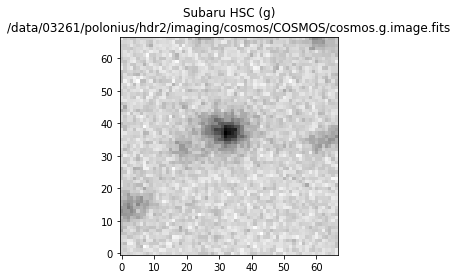

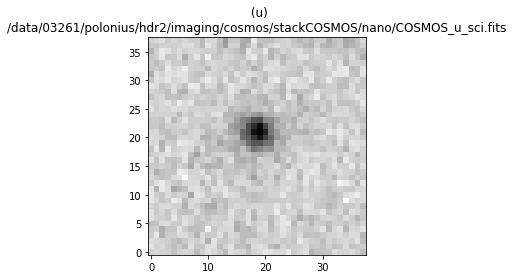

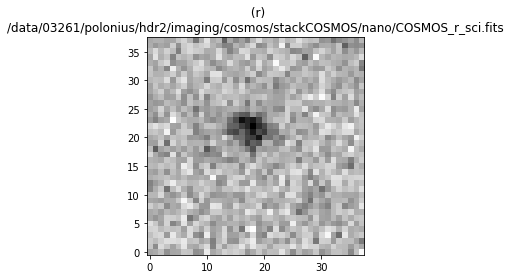

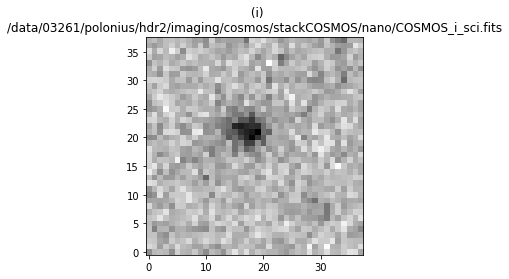

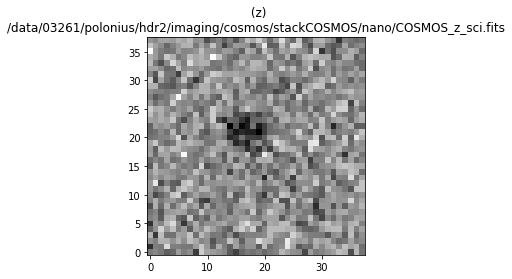

In [11]:
#exmaple of iterating through the cutouts with simple plots
for c in cutouts:
    plt.figure()
    plt.title("%s (%s)\n%s" %(c['instrument'],c['filter'],c['path']))
    plt.imshow(c['cutout'].data, origin="lower", cmap="gray_r")
    

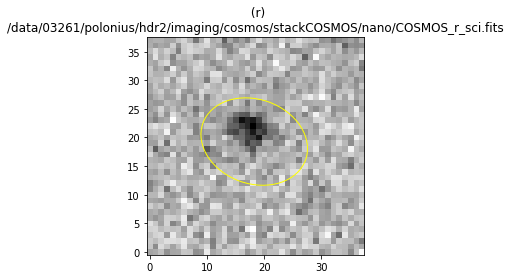

In [12]:
#example of overplotting the source extractor aperture using pixel coordinates
from matplotlib.patches import Ellipse
import numpy as np
cutout = cutouts[2]
fig, ax = plt.subplots()
plt.title("%s (%s)\n%s" %(cutout['instrument'],cutout['filter'],cutout['path']))
plt.imshow(cutout['cutout'].data, origin="lower", cmap="gray_r")

sep_ap = cutout['details']['sep_objects'][cutout['details']['sep_obj_idx']]

#note: here the coordinate 0,0 is in the lower-left, instead of the center
#and this is square, so just using one offset
coord_offset = 0.5 * (ax.get_xlim()[0] + ax.get_xlim()[1])


e = Ellipse(xy=(sep_ap['x'] + coord_offset, sep_ap['y']+coord_offset),
                    width=6. * sep_ap['a'], #diameter with (*6 is for *6 kron isophotal units)
                    height=6. * sep_ap['b'],
                    angle=sep_ap['theta'] * 180. / np.pi)
e.set_facecolor('none')
e.set_edgecolor('yellow')

ax.add_artist(e)

# You can also plot using WCS coordinates by setting a projection and using a coordinate transform

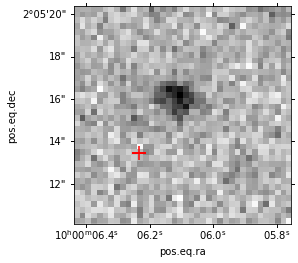

In [13]:
some_ra = 150.02542 + 2./3600. #shift east by 2"
some_dec =  2.08763 - 2./3600. #shift south by 2#
plt.subplot(projection=cutout['cutout'].wcs)
plt.imshow(cutout['cutout'].data, origin="lower", cmap="gray_r")  
#add a point by its RA, Dec
plt.scatter(some_ra, some_dec, transform=plt.gca().get_transform('world'),marker='+', color='red',s=200)

# example of iterating through and writing out each as its own FITS 
# you can then open in ds9 and examine

In [14]:

import astropy.io.fits as fits

for i in range(len(cutouts)):
    co = cutouts[i]['cutout']
    hdu = fits.PrimaryHDU(co.data) #essentially empty header
    hdu.header.update(co.wcs.to_header()) #insert the cutout's WCS
    hdu.writeto('test_cutout_%d.fits' %i, overwrite=True)

# collect the catalog objects within the provided coordinate and radius


In [15]:
objs = catlib.get_catalog_objects(coord,10.)
#as with get_cutouts, you can also, optionally, pass in a list of catalogs to restrict the search
#objs = catlib.get_catalog_objects(coord,10./3600.,cats)

Reading main catalog for  STACK_COSMOS


What is returned is a list of dictionaries that include pandas dataframes from the overlapping catalogs. The dictionary contains:

'name' = the name of the catalog

'count' = the number of objects found within the radius

'dataframe' = the pandas data frame (the columns in the dataframe depend on the catalog, but will always contain 'RA','DEC', and 'distance' where distance is the angular distance from the target coordinate)


In [16]:
#find the number of objects
print(objs[0]['name'],objs[0]['count'])

#what columns are available
print(objs[0]['dataframe'].columns)

#here we iterate over the entries and print out some of the columns
for i,rec in objs[0]['dataframe'].iterrows():
    print(rec['RA'],rec['DEC'],rec['MAG_AUTO'],rec['distance'])

STACK_COSMOS 4
Index(['ID', 'RA', 'DEC', 'FLUX_AUTO', 'FLUXERR_AUTO', 'MAG_AUTO',
       'MAGERR_AUTO', 'distance', 'dist_prior', 'catalog_mag',
       'catalog_filter', 'catalog_flux', 'catalog_flux_err'],
      dtype='object')
150.02540962192847 2.0877697097369734 -0.5871770977973938 0.00016974833071894821
150.02685673187574 2.089671906787409 -2.590500593185425 0.002528760163608183
150.02774557924081 2.0880270878613354 -0.20392510294914246 0.0023767144943791186
150.02305491270553 2.0881783979241066 -0.22997774183750153 0.002419673679966474
